<a href="https://colab.research.google.com/github/eloelodie/MPA_MLF/blob/master/MPA_MLF_Ex_07_Elodie_CHEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

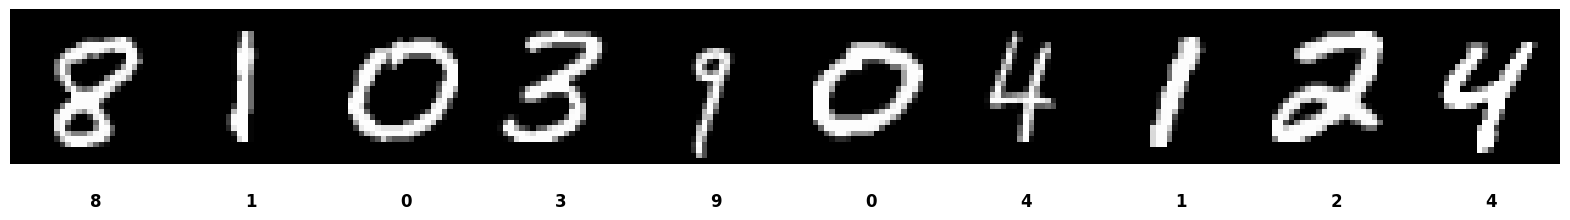

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [ ]:
###################################
# Write your own code here #

# Normalize the images to a range of 0 to 1
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

# Reshape the data to add a channel dimenssion
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [ ]:
model = Sequential()
###################################
# Write your own code here #

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

###################################


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

###################################
# Write your own code here #


###################################
model.summary()

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
###################################
# Write your own code here #

history = model.fit(X_train,y_train, epochs=10, batch_size=128, validation_data=(X_test,y_test), verbose=1)

###################################

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.8791 - loss: 0.4398 - val_accuracy: 0.9756 - val_loss: 0.0836
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9778 - loss: 0.0762 - val_accuracy: 0.9782 - val_loss: 0.0604
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9833 - val_loss: 0.0493
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9861 - val_loss: 0.0423
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9867 - val_loss: 0.0389
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9844 - val_loss: 0.0489
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9850 - val_loss: 0.0475
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9974 - loss: 0.0101 - 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

Loss 0.04
Accuracy 98.69%


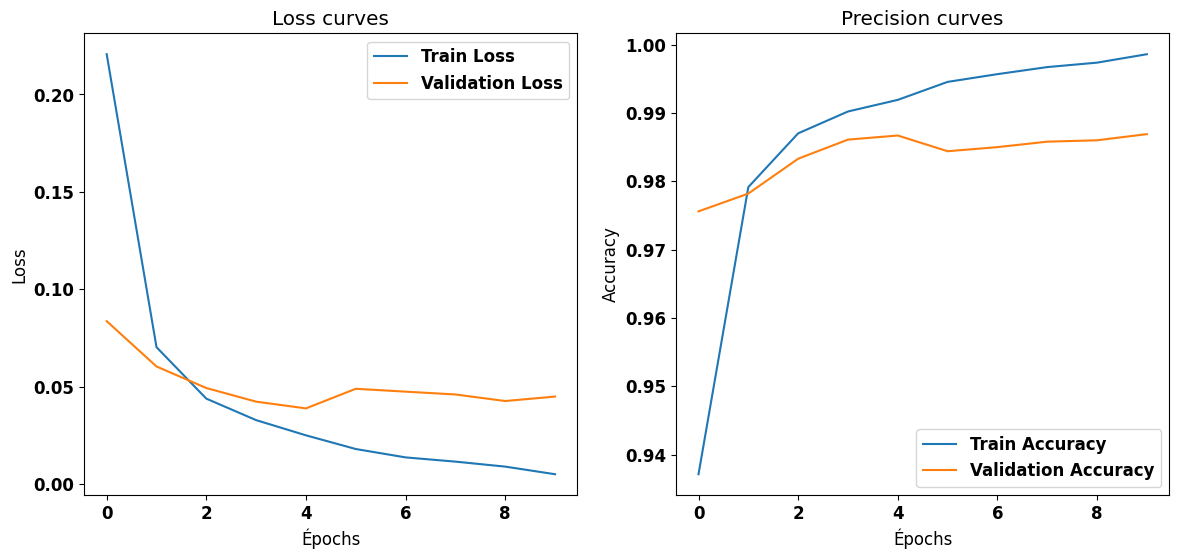

In [ ]:
###################################
# Write your own code here #

score = model.evaluate(X_test, y_test, verbose=0)
print("Loss {:.2F}".format(score[0]))
print("Accuracy {:.2F}%".format(score[1]*100))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss curves')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precision curves')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


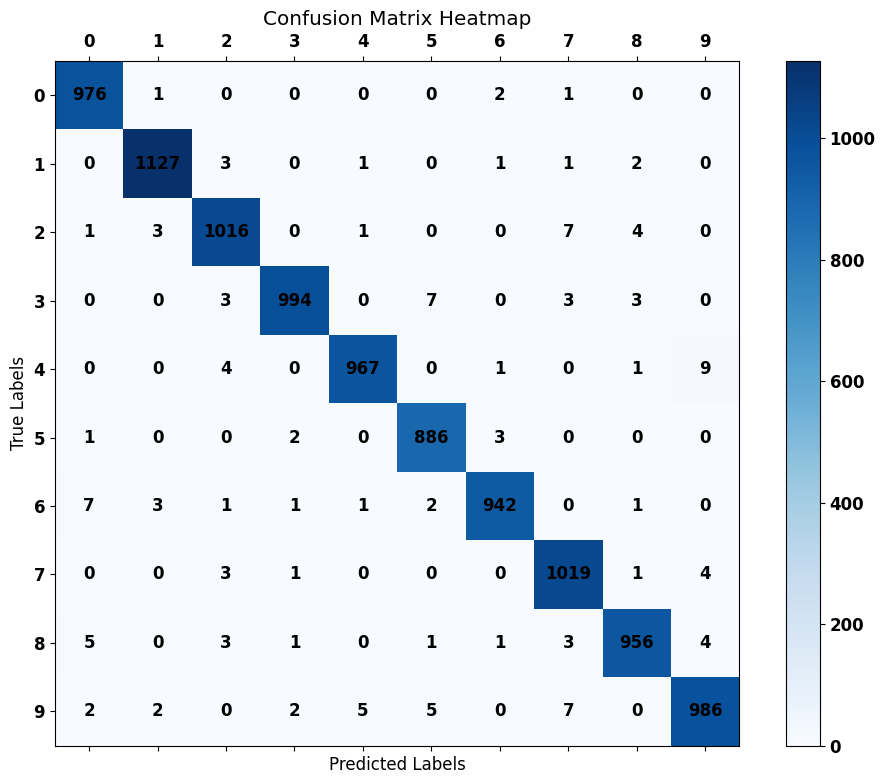

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
###################################
# Write your own code here #

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate labels
labels = [str(i) for i in range(10)]

# Predictions of the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Affichage de la matrice de confusion en tant que heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)


for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        ax.text(j, i, str(conf_matrix[i][j]), va='center', ha='center', color='black')


ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(true_classes, predicted_classes))


###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [ ]:
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(units=10, activation='softmax')
])

# Compilation & entertainement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%\n")


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix, "\n")


print("Classification Report:")
print(classification_report(true_classes, predicted_classes))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.8545 - loss: 0.6692 - val_accuracy: 0.9639 - val_loss: 0.2258
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.9619 - loss: 0.2224 - val_accuracy: 0.9704 - val_loss: 0.1852
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.9725 - loss: 0.1698 - val_accuracy: 0.9780 - val_loss: 0.1502
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.9757 - loss: 0.1532 - val_accuracy: 0.9752 - val_loss: 0.1548
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9763 - loss: 0.1466 - val_accuracy: 0.9778 - val_loss: 0.1389
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9783 - loss: 0.1350 - val_accuracy: 0.9739 - val_loss: 0.1479
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9808 - loss: 0.1265 - val_accuracy: 0.9770 - val_loss: 0.1345
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9825 - loss: 0.1201 - 